Realizar histogram matching de acuerdo a:

https://github.com/CONABIO/antares3/blob/training-data-model-fit/madmex/lcc/bitemporal/distance.py#L5

# 1

Registrar productos de surfaces reflectances del año 95-96 (algunas escenas) disponibles en s3.

Se eligió el dc tile: (21,-19) definido de acuerdo al tiling en los archivos de configuración del satélite landsat de antares3.

Este dc tile corresponde al path/row: 032 042 (Durango) y de las escenas que están disponibles en s3 para el año 95-96 están:

LT050320421995020601T1-SC20180529121712/
LT050320421995031001T1-SC20180529121554/
LT050320421995041101T1-SC20180529121727/
LT050320421995051301T1-SC20180529121345/
LT050320421995100401T1-SC20180529121414/
LT050320421995102001T1-SC20180529120628/
LT050320421995112101T1-SC20180529121834/
LT050320421996010801T2-SC20180529123117/
LT050320421996012401T2-SC20180529122022/
LT050320421996031201T1-SC20180529122036/
LT050320421996041301T1-SC20180529121850/
LT050320421996042901T1-SC20180529121810/
LT050320421996051501T1-SC20180529122435/
LT050320421996102201T1-SC20180529123018/
LT050320421996110701T1-SC20180529122414/
LT050320421996112301T1-SC20180529121903/

Se eligen registrar:

LT050320421995020601T1-SC20180529121712/
LT050320421995031001T1-SC20180529121554/
LT050320421995112101T1-SC20180529121834/
LT050320421996012401T2-SC20180529122022/
LT050320421996031201T1-SC20180529122036/
LT050320421996110701T1-SC20180529122414/
LT050320421996112301T1-SC20180529121903/

y se copian a :

```
/LUSTRE/MADMEX/tasks/2019_tasks/histogram_matching/scenes_95_96/

/shared_volume/tasks/2019_tasks/histogram_matching/scenes_95_96/
```

Pasos de prepare, product add, dataset add e ingest:


```
antares prepare_metadata --path /shared_volume/tasks/2019_tasks/histogram_matching/scenes_95_96/ --dataset_name landsat_espa --outfile metadata_mex_l5.yaml -sc /shared_volume/scheduler.json

datacube -v product add ~/.config/madmex/indexing/ls5_espa_scenes.yaml

datacube -v dataset add metadata_mex_l5.yaml

datacube -v ingest -c ~/.config/madmex/ingestion/ls5_espa_mexico.yaml --executor distributed 172.17.0.2:8786
```


Check via cmd line

datacube product list

```
ls5_espa_mexico Landsat 5 Collection 1 processed to surface reflectance by espa. Resampled to 30m Mexico INEGI Lambert Conformal Conic projection with a 50 km tile size.
ls5_espa_scene  Landsat 5 Collection 1 Higher Level SR scene processed by ESPA. 30m UTM based projection.
```

# 2

Registrar los productos de las recetas (dc tile: (21,-19) para años 2014-2015) de acuerdo al notebook:

https://github.com/CONABIO/antares3-sandbox/blob/master/notebooks/ingest_recipe_products/ingest_recipe_products.ipynb

# 3 histogram matching

Uso de: https://github.com/CONABIO/antares3/blob/training-data-model-fit/madmex/lcc/bitemporal/distance.py#L5

Referencias:

https://github.com/mapbox/rio-hist

https://blog.mapbox.com/color-balancing-imagery-with-histogram-matching-be1b38c28509


## A) Cargar producto de años `source` (1995-1996)

In [1]:
%matplotlib inline
import matplotlib
from datacube.api import GridWorkflow

from madmex.wrappers import gwf_query
from madmex.util import join_dicts

In [2]:
product = ['ls5_espa_mexico']
begin = '1995-01-01'
end = '1996-12-31'
region = 'Durango'
gwf_kwargs = {'region': region, 'begin': begin, 'end': end}
dc_tile=(21,-19)
dict_list=[]

In [3]:
for prod in product:
    gwf_kwargs.update(product = prod)
    try:
        dict_list.append(gwf_query(**gwf_kwargs, view=False))
    # Exception is in case one of the product hasn't been registered in the datacube
    except Exception as e:
        pass
iterable = join_dicts(*dict_list, join='full').items()

In [4]:
lista_iter = list(iterable)

In [5]:
index = [x for x in range(0,len(lista_iter)) if lista_iter[x][0] == dc_tile]

In [6]:
var_source = lista_iter[index[0]]

In [7]:
var_source

((21, -19), [Tile<sources=<xarray.DataArray (time: 7)>
  array([(Dataset <id=979bee9a-40f0-4e12-bd21-86d0d2db3087 type=ls5_espa_mexico location=file:///shared_volume/datacube/datacube_ingest/LS5_espa/mexico/LS5_espa_21_-19_19950206164648000000.nc>,),
         (Dataset <id=4c9a2386-597c-405c-bbd9-f076e077ff71 type=ls5_espa_mexico location=file:///shared_volume/datacube/datacube_ingest/LS5_espa/mexico/LS5_espa_21_-19_19950310164531000000.nc>,),
         (Dataset <id=b817293f-7dda-48a8-a7d6-1a95dee6ab6d type=ls5_espa_mexico location=file:///shared_volume/datacube/datacube_ingest/LS5_espa/mexico/LS5_espa_21_-19_19951121163445000000.nc>,),
         (Dataset <id=37a54d8c-88e4-4883-8e41-d02830400be5 type=ls5_espa_mexico location=file:///shared_volume/datacube/datacube_ingest/LS5_espa/mexico/LS5_espa_21_-19_19960124163902000000.nc>,),
         (Dataset <id=98f4c96b-fbd2-4441-8195-6529852872df type=ls5_espa_mexico location=file:///shared_volume/datacube/datacube_ingest/LS5_espa/mexico/LS5_espa_

## B) Cargar producto de años `template` (2014-2015)

In [8]:
import xarray as xr

In [9]:
product = ['recipe_mex_L7L8_1415']
begin = '2014-01-01'
end = '2015-12-31'
region = 'Durango'
gwf_kwargs = {'region': region,  'begin': begin, 'end': end}
dc_tile=(21,-19)
dict_list=[]

In [10]:
for prod in product:
    gwf_kwargs.update(product = prod)
    try:
        dict_list.append(gwf_query(**gwf_kwargs, view=False))
    # Exception is in case one of the product hasn't been registered in the datacube
    except Exception as e:
        pass
iterable = join_dicts(*dict_list, join='full').items()

In [11]:
lista_iter_template = list(iterable)

In [12]:
index_template = [x for x in range(0,len(lista_iter_template)) if lista_iter_template[x][0] == dc_tile]

In [13]:
var_template = lista_iter_template[index_template[0]]

In [14]:
var_template

((21, -19), [Tile<sources=<xarray.DataArray (time: 1)>
  array([(Dataset <id=68d0425b-0a05-5455-a0f4-2bb2029abb86 type=recipe_mex_L7L8_1415 location=file://shared_volume/datacube/datacube_ingest/recipes/recipe_mex_L7L8_1415/madmex_003_21_-19_2014-12-31.nc>,)],
        dtype=object)
  Coordinates:
    * time     (time) datetime64[ns] 2014-12-31T12:00:00,
  	geobox=GeoBox(1667, 1667, Affine(30.0, 0.0, 2027370.0,
         0.0, -30.0, 1526540.0), PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,6556752.3141]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["standard_parallel_1",17.5],PARAMETER["standard_parallel_2",29.5],PARAMETER["latitude_of_origin",12],PARAMETER["central_meridian",-102],PARAMETER["false_easting",2500000],PARAMETER["false_northing",0]])>])

In [15]:
sr_template = xr.auto_combine([GridWorkflow.load(x, dask_chunks={'x': 600, 'y': 600}) for x in var_template[1]], concat_dim='time')

In [16]:
sr_template

<xarray.Dataset>
Dimensions:     (time: 1, x: 1667, y: 1667)
Coordinates:
  * y           (y) float64 1.527e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x           (x) float64 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
  * time        (time) datetime64[ns] 2014-12-31T12:00:00
Data variables:
    blue_mean   (time, y, x) int16 dask.array<shape=(1, 1667, 1667), chunksize=(1, 600, 600)>
    green_mean  (time, y, x) int16 dask.array<shape=(1, 1667, 1667), chunksize=(1, 600, 600)>
    red_mean    (time, y, x) int16 dask.array<shape=(1, 1667, 1667), chunksize=(1, 600, 600)>
    nir_mean    (time, y, x) int16 dask.array<shape=(1, 1667, 1667), chunksize=(1, 600, 600)>
    swir1_mean  (time, y, x) int16 dask.array<shape=(1, 1667, 1667), chunksize=(1, 600, 600)>
    swir2_mean  (time, y, x) int16 dask.array<shape=(1, 1667, 1667), chunksize=(1, 600, 600)>
    ndvi_mean   (time, y, x) int16 dask.array<shape=(1, 1667, 1667), chunksize=(1, 600, 600)>
    ndmi_mean   (time, y, x) int16 dask.array<shap

In [17]:
sr_template.blue_mean

<xarray.DataArray 'blue_mean' (time: 1, y: 1667, x: 1667)>
dask.array<shape=(1, 1667, 1667), dtype=int16, chunksize=(1, 600, 600)>
Coordinates:
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
  * time     (time) datetime64[ns] 2014-12-31T12:00:00
Attributes:
    units:    reflectance
    nodata:   -9999
    crs:      PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS8...

## C) Continuación de loading & masking de `source` (antes de cálculo de métricas en recetas)

In [18]:
from datacube.storage import masking

from madmex.util.xarray import to_float, to_int

In [19]:
crs = var_source[1][0].geobox.crs

In [20]:
sr_source = xr.auto_combine([GridWorkflow.load(x, dask_chunks={'x': 600, 'y': 600}) for x in var_source[1]], concat_dim='time')

In [21]:
sr_source.attrs['geobox'] = var_source[1][0].geobox

In [22]:
clear = masking.make_mask(sr_source.pixel_qa, cloud=False, cloud_shadow=False,
                          snow=False)
sr_source_1 = sr_source.where(clear)
sr_source_1 = sr_source_1.drop('pixel_qa')
sr_source_1 = sr_source_1.apply(func=to_float, keep_attrs=True)

In [23]:
sr_source_1

<xarray.Dataset>
Dimensions:  (time: 7, x: 1667, y: 1667)
Coordinates:
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
  * time     (time) datetime64[ns] 1995-02-06T16:46:48 ... 1996-11-23T16:56:17
Data variables:
    blue     (time, y, x) float64 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    green    (time, y, x) float64 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    red      (time, y, x) float64 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    nir      (time, y, x) float64 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    swir1    (time, y, x) float64 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
    swir2    (time, y, x) float64 dask.array<shape=(7, 1667, 1667), chunksize=(7, 600, 600)>
Attributes:
    geobox:   GeoBox(Geometry({'type': 'Polygon', 'coordinates': [[(-106.7330...

## D) Histogram matching para cada banda de source tomando referencia bandas de template

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def hist_match_and_plot(source2D, reference2D):
    orig_shape = source2D.shape
    s_values, s_idx, s_counts = np.unique(source2D, return_inverse=True, return_counts=True)
    r_values, r_counts = np.unique(reference2D, return_counts=True)
    s_quantiles = np.cumsum(s_counts).astype(np.float64) / source2D.size
    r_quantiles = np.cumsum(r_counts).astype(np.float64) / reference2D.size
    interp_r_values = np.interp(s_quantiles, r_quantiles, r_values)
    target = interp_r_values[s_idx].reshape(orig_shape)
    t_values, t_counts = np.unique(target, return_counts=True)
    t_quantiles = np.cumsum(t_counts).astype(np.float64) / target.size
    plt.plot(s_values, s_quantiles, label="Source")
    plt.plot(r_values, r_quantiles, label="Reference")
    plt.plot(t_values, t_quantiles, '--r', lw=2, label="Target")
    plt.legend(loc=5)
    plt.show()
    return target

In [26]:
#def call_hist_match(source2D, reference2D, band, n_times):
#    s_band = source2D[band]
#    #target_DS = xr.Dataset({band: None}, coords = s_band.coords)
#    #target_DS[band] = s_band.copy(data=None)
#    #for k in range(0,n_times):
#    #    target = hist_match_and_plot(s_band.isel(time=k).values,
#    #                                 reference2D)
#    #    target_DS[band][k].values = xr.DataArray(target, dims = ['y','x'])
#        #target_DS.update()
#        #target_DA = xr.DataArray(target, coords = {'y': s_band.coords['y'],
#        #                                           'x': s_band.coords['x'],
#        #                                           'time': s_band.coords['time'][k]},
#        #                         dims = ['y','x'])
#        #source2D[band].isel(time=k).values = target_DA.values
#        #s_band.isel(time=k).values = target
#        #target_DS[band]
#        #target_DS[band].isel(time=k).values = target
#        #s_band[k].values = target
#    #source2D[band].update(s_band)
#    #target_DS = xr.Dataset({band: s_band})
#    target_0 = xr.DataArray(hist_match_and_plot(s_band.isel(time=0).values,reference2D), dims=['y','x'],
#                           coords= {'y': s_band.coords['y'],
#                                    'x': s_band.coords['x'],
#                                    'time': s_band.coords['time'][0]},
#                            name=band)
#    target_3 = xr.DataArray(hist_match_and_plot(s_band.isel(time=3).values,reference2D), dims=['y','x'],
#                            coords= {'y': s_band.coords['y'],
#                                     'x': s_band.coords['x'],
#                                     'time': s_band.coords['time'][3]},
#                            name=band)
#    #target_DS = xr.Dataset.merge([target_0, target_3])
#    
#    target_DA = xr.concat([target_0, target_3], dim='time')
#    return target_DA

In [27]:
def call_hist_match(source2D, reference2D, band, n_times):
    s_band = source2D[band]
    for k in range(0,n_times):
        target = xr.DataArray(hist_match_and_plot(s_band.isel(time=k).values,reference2D),
                                dims=['y','x'],
                                coords= {'y': s_band.coords['y'],
                                         'x': s_band.coords['x'],
                                         'time': s_band.coords['time'][k]})
        if(k==0):
            target_DA=target
        else:
            target_DA=xr.concat([target_DA,target],dim='time')
    return target_DA

Testing band of particular time

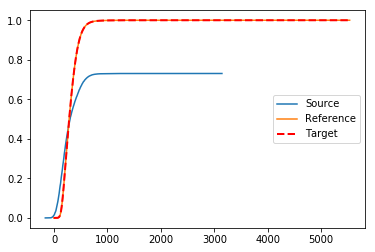

In [28]:
res_hist = hist_match_and_plot(sr_source_1.blue.isel(time=3).values, sr_template.blue_mean.values)

what needs to happen:

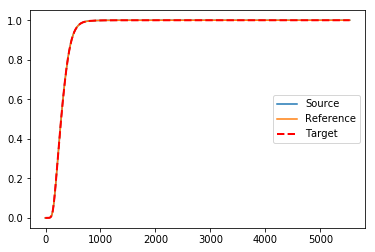

array([[ 193.63540877,  193.63540877,  125.01367951, ...,  240.35608151,
         240.35608151,  205.82111841],
       [ 157.13537536,  140.7842067 ,  157.13537536, ...,  240.35608151,
         239.32451328,  205.82111841],
       [ 193.63540877,  176.1919071 ,  157.13537536, ...,  223.09737789,
         223.09737789,  239.32451328],
       ...,
       [ 414.20837696,  414.20816754,  414.21005236, ...,  416.10992757,
         416.10971453,  416.10950149],
       [ 416.10928845,  416.10907542,  416.10886238, ...,  415.30961621,
         415.3094006 ,  415.30422596],
       [ 415.3113411 ,  415.30401035,  415.30120742, ...,  407.00868161,
         483.70743677, 5532.        ]])

In [29]:
hist_match_and_plot(res_hist, sr_template.blue_mean.values)

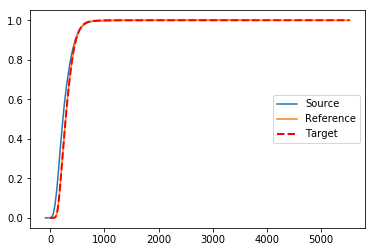

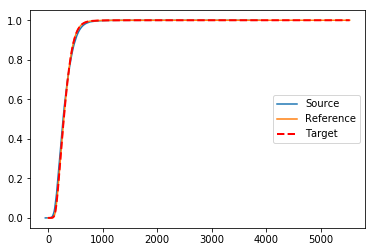

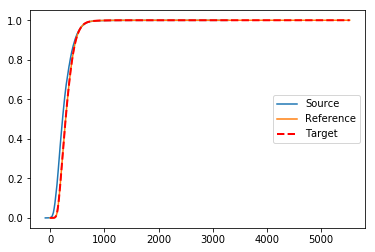

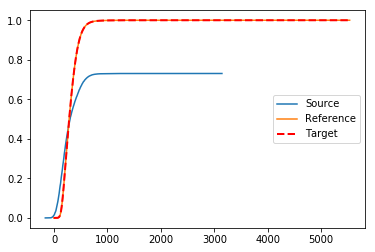

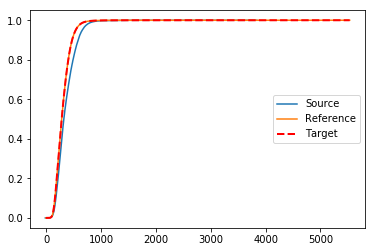

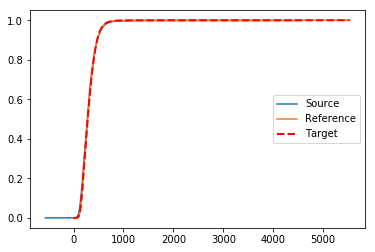

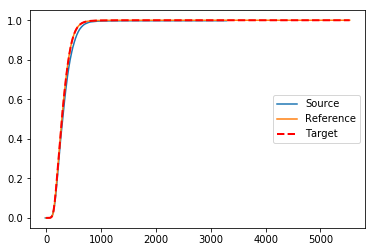

In [30]:
res = call_hist_match(sr_source_1,sr_template.blue_mean.values, 'blue', sr_source_1.dims['time'])

In [31]:
res

<xarray.DataArray (time: 7, y: 1667, x: 1667)>
array([[[203.87446 , 179.884234, ..., 381.992207, 298.051397],
        [179.884234, 179.884234, ..., 402.161035, 320.928665],
        ...,
        [315.401977, 315.401977, ..., 323.626978, 301.096721],
        [337.252047, 358.005002, ..., 277.425577, 253.848491]],

       [[184.370611, 163.194026, ..., 326.269359, 326.269359],
        [204.081296, 163.194026, ..., 393.178646, 343.891766],
        ...,
        [142.39411 , 123.888219, ..., 290.092463, 229.826119],
        [161.390068, 141.481092, ..., 229.826119, 249.662149]],

       ...,

       [[266.566181, 199.286097, ..., 440.774848, 358.668536],
        [244.60809 , 157.864351, ..., 480.959985, 440.774848],
        ...,
        [155.676793, 175.417579, ..., 379.52002 , 289.282203],
        [135.937167, 175.417579, ..., 247.793485, 247.793485]],

       [[272.417706, 272.417706, ..., 337.875485, 251.422948],
        [295.077417, 248.353879, ..., 337.875485, 316.402685],
        ...,


In [32]:
res.isel(time=0)

<xarray.DataArray (y: 1667, x: 1667)>
array([[203.87446 , 179.884234, 156.748839, ..., 402.161035, 381.992207,
        298.051397],
       [179.884234, 179.884234, 179.884234, ..., 443.530926, 402.161035,
        320.928665],
       [156.748839, 156.748839, 156.748839, ..., 443.530926, 402.161035,
        362.386501],
       ...,
       [337.252047, 378.491281, 378.491281, ..., 301.096721, 323.626978,
        404.141462],
       [315.401977, 315.401977, 358.005002, ..., 323.626978, 323.626978,
        301.096721],
       [337.252047, 358.005002, 358.005002, ..., 344.325665, 277.425577,
        253.848491]])
Coordinates:
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
    time     datetime64[ns] 1995-02-06T16:46:48

In [33]:
res.isel(time=6)

<xarray.DataArray (y: 1667, x: 1667)>
array([[272.417706, 272.417706, 272.417706, ..., 420.671711, 337.875485,
        251.422948],
       [295.077417, 248.353879, 225.368515, ..., 440.599262, 337.875485,
        316.402685],
       [295.077417, 225.368515, 225.368515, ..., 440.599262, 360.038098,
        337.875485],
       ...,
       [153.395218, 110.12021 , 175.193199, ..., 272.417706, 293.576905,
        398.726279],
       [131.404059,  88.381443, 175.193199, ..., 293.576905, 293.576905,
        272.417706],
       [110.770079, 130.357727, 175.193199, ..., 335.974237, 272.417706,
        203.921999]])
Coordinates:
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
    time     datetime64[ns] 1996-11-23T16:56:17

checking result:

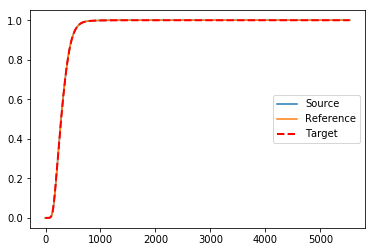

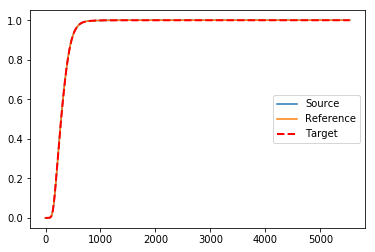

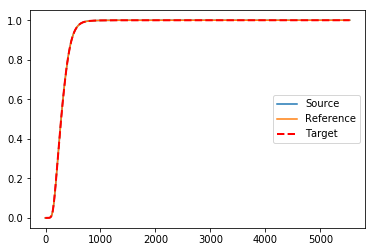

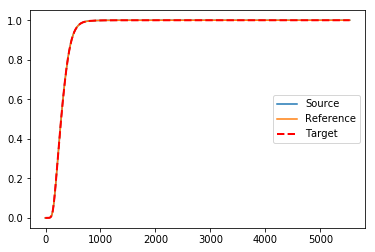

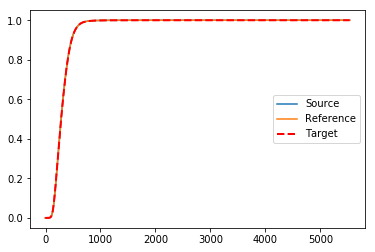

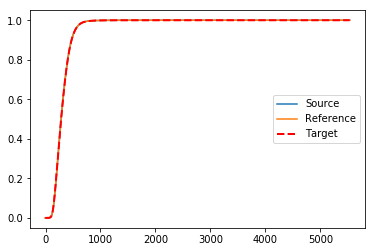

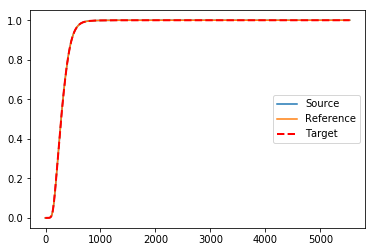

[array([[203.87445979, 179.88423387, 156.74883917, ..., 402.16103495,
         381.99220735, 298.05139733],
        [179.88423387, 179.88423387, 179.88423387, ..., 443.53092647,
         402.16103495, 320.92866458],
        [156.74883917, 156.74883917, 156.74883917, ..., 443.53092647,
         402.16103495, 362.38650116],
        ...,
        [337.25204653, 378.49128102, 378.49128102, ..., 301.09672089,
         323.62697785, 404.14146151],
        [315.40197736, 315.40197736, 358.00500152, ..., 323.62697785,
         323.62697785, 301.09672089],
        [337.25204653, 358.00500152, 358.00500152, ..., 344.32566499,
         277.42557701, 253.84849147]]),
 array([[184.37061133, 163.19402601, 184.37061133, ..., 376.54475874,
         326.26935892, 326.26935892],
        [204.08129578, 163.19402601, 204.08129578, ..., 428.36408335,
         393.17864554, 343.89176636],
        [184.37061133, 163.19402601, 184.37061133, ..., 428.36408335,
         410.48449773, 343.89176636],
        ...,


In [34]:
[hist_match_and_plot(res.isel(time=k).values, sr_template.blue_mean.values) for k in range(0,7)]

Just some tests

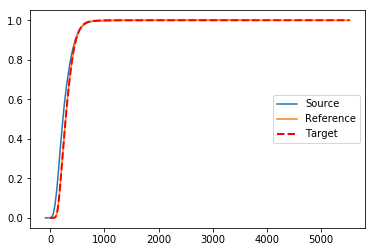

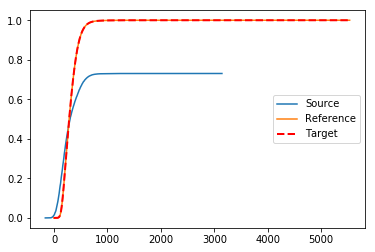

In [35]:
target_0 = xr.DataArray(hist_match_and_plot(sr_source_1.blue.isel(time=0).values, 
                                            sr_template.blue_mean.values), dims=['y','x'],
                        coords= {'y': sr_source_1.blue.coords['y'],
                                 'x': sr_source_1.blue.coords['x'],
                                 'time': sr_source_1.blue.coords['time'][0]},
                        name='dummy0')
target_3 = xr.DataArray(hist_match_and_plot(sr_source_1.blue.isel(time=3).values, 
                                            sr_template.blue_mean.values), dims=['y','x'],
                        coords= {'y': sr_source_1.blue.coords['y'],
                                 'x': sr_source_1.blue.coords['x'],
                                 'time': sr_source_1.blue.coords['time'][3]},
                        name='dummy3')


In [36]:
target_0

<xarray.DataArray 'dummy0' (y: 1667, x: 1667)>
array([[203.87446 , 179.884234, 156.748839, ..., 402.161035, 381.992207,
        298.051397],
       [179.884234, 179.884234, 179.884234, ..., 443.530926, 402.161035,
        320.928665],
       [156.748839, 156.748839, 156.748839, ..., 443.530926, 402.161035,
        362.386501],
       ...,
       [337.252047, 378.491281, 378.491281, ..., 301.096721, 323.626978,
        404.141462],
       [315.401977, 315.401977, 358.005002, ..., 323.626978, 323.626978,
        301.096721],
       [337.252047, 358.005002, 358.005002, ..., 344.325665, 277.425577,
        253.848491]])
Coordinates:
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
    time     datetime64[ns] 1995-02-06T16:46:48

In [37]:
target_3

<xarray.DataArray 'dummy3' (y: 1667, x: 1667)>
array([[ 193.635409,  193.635409,  125.01368 , ...,  240.356082,  240.356082,
         205.821118],
       [ 157.135375,  140.784207,  157.135375, ...,  240.356082,  239.324513,
         205.821118],
       [ 193.635409,  176.191907,  157.135375, ...,  223.097378,  223.097378,
         239.324513],
       ...,
       [ 414.208377,  414.208168,  414.210052, ...,  416.109928,  416.109715,
         416.109501],
       [ 416.109288,  416.109075,  416.108862, ...,  415.309616,  415.309401,
         415.304226],
       [ 415.311341,  415.30401 ,  415.301207, ...,  407.008682,  483.707437,
        5532.      ]])
Coordinates:
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
    time     datetime64[ns] 1996-01-24T16:39:02

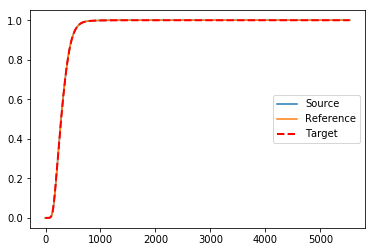

array([[203.87445979, 179.88423387, 156.74883917, ..., 402.16103495,
        381.99220735, 298.05139733],
       [179.88423387, 179.88423387, 179.88423387, ..., 443.53092647,
        402.16103495, 320.92866458],
       [156.74883917, 156.74883917, 156.74883917, ..., 443.53092647,
        402.16103495, 362.38650116],
       ...,
       [337.25204653, 378.49128102, 378.49128102, ..., 301.09672089,
        323.62697785, 404.14146151],
       [315.40197736, 315.40197736, 358.00500152, ..., 323.62697785,
        323.62697785, 301.09672089],
       [337.25204653, 358.00500152, 358.00500152, ..., 344.32566499,
        277.42557701, 253.84849147]])

In [38]:
hist_match_and_plot(target_0.values, sr_template.blue_mean.values)

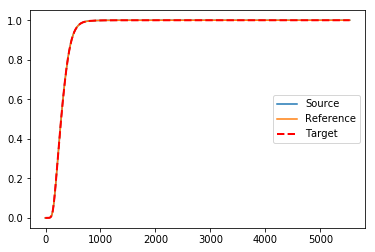

array([[ 193.63540877,  193.63540877,  125.01367951, ...,  240.35608151,
         240.35608151,  205.82111841],
       [ 157.13537536,  140.7842067 ,  157.13537536, ...,  240.35608151,
         239.32451328,  205.82111841],
       [ 193.63540877,  176.1919071 ,  157.13537536, ...,  223.09737789,
         223.09737789,  239.32451328],
       ...,
       [ 414.20837696,  414.20816754,  414.21005236, ...,  416.10992757,
         416.10971453,  416.10950149],
       [ 416.10928845,  416.10907542,  416.10886238, ...,  415.30961621,
         415.3094006 ,  415.30422596],
       [ 415.3113411 ,  415.30401035,  415.30120742, ...,  407.00868161,
         483.70743677, 5532.        ]])

In [39]:
hist_match_and_plot(target_3.values, sr_template.blue_mean.values)

In [40]:
xr.concat([target_0, target_3],dim='time')

<xarray.DataArray 'dummy0' (time: 2, y: 1667, x: 1667)>
array([[[ 203.87446 ,  179.884234, ...,  381.992207,  298.051397],
        [ 179.884234,  179.884234, ...,  402.161035,  320.928665],
        ...,
        [ 315.401977,  315.401977, ...,  323.626978,  301.096721],
        [ 337.252047,  358.005002, ...,  277.425577,  253.848491]],

       [[ 193.635409,  193.635409, ...,  240.356082,  205.821118],
        [ 157.135375,  140.784207, ...,  239.324513,  205.821118],
        ...,
        [ 416.109288,  416.109075, ...,  415.309401,  415.304226],
        [ 415.311341,  415.30401 , ...,  483.707437, 5532.      ]]])
Coordinates:
  * y        (y) float64 1.527e+06 1.526e+06 1.526e+06 ... 1.477e+06 1.477e+06
  * x        (x) float64 2.027e+06 2.027e+06 2.027e+06 ... 2.077e+06 2.077e+06
  * time     (time) datetime64[ns] 1995-02-06T16:46:48 1996-01-24T16:39:02

In [41]:
xr.Dataset(xr.concat([target_0, target_3],dim='time'))

TypeError: unhashable type: 'DataArray'